
# Python graphics:  Matplotlib fundamentals

We illustrate three approaches to graphing data with Python's Matplotlib package:    

* [Approach 1](#Approach-1:--Apply-plot-methods-to-dataframes):  Apply a `plot()` method to a dataframe
* [Approach 2](#Approach-2:--plt.plot):  Use the `plot(x,y)` function from `matplotlib.pyplot`
* [Approach 3](#Approach-3:--Create-figure-objects-and-apply-methods):  Create a figure object and apply methods to it

The last one is the least intuitive but also the most useful.  We work up to it gradually.  This [book chapter](https://davebackus.gitbooks.io/test/content/graphs1.html) covers the same material with more words and fewer pictures.  

## Reminders

* **Packages**:  collections of tools that we access with `import` statements
* **Pandas**:  Python's data package 
* **Objects** and **methods**:  we apply the method `justdoit` to the object `x` with `x.justdoit`
* **Dataframe**:  a spreadsheet-like data structure 
* **Series**:  a single variable 
* **Jupyter**:  an environment for combining code with text and graphics 

## Preliminaries 

### Jupyter 

Look around, what do you see?  Check out the **menubar** at the top:  File, Edit, etc.  Also the **toolbar** below it.  Click on Help -> User Interface Tour for a tour of the landscape.  

The **cells** below come in two forms.  Those labeled Code (see the menu in the toolbar) are Python code.  Those labeled Markdown are text.  

### Markdown 

Simplified version of **html** (the language used to construct basic websites). Best way to learn about its rules is by clicking on a cell that contains text and try to imitate what you see. (More about it later and in the book.) 

### Import packages


In [1]:
# make plots show up in notebook
%matplotlib inline                     

import pandas as pd                    # data package
import matplotlib.pyplot as plt        # pyplot module

**Comment.**  When you run the code cell above, its output appears below it.  

**Exercise.** Enter `pd.read_csv?` in the empty cell below.  Run the cell (Cell at the top, or shift-enter).  Do you see the documentation?  This is the Jupyter version of help in Spyder's IPython console.  

In [8]:
pd.read_csv?

### Create dataframes to play with 

* US GDP and consumption 
* World Bank GDP per capita for several countries 
* Fama-French equity returns 

## Data input 3:  APIs

Last time we saw how to read 
* internet files using links 
* files on your computer. 

The `pandas` method was `read_csv()` and `read_excel()`. A third way is through APIs.

APIs are "application program interfaces".  A dataset with an API allows access through some method other than a spreadsheet.  

The API is the set of rules for accessing the data. People have written easy-to-use code to access the APIs.  

The Pandas developers have created what they call a set of [Remote Data Access tools](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) and have put them into a package called `pandas_datareader`. 

### FRED. 

The St Louis Fed has put together a large collection of time series data that they refer to as [FRED](https://research.stlouisfed.org/fred2/):  Federal Reserve Economic Data.  They started with the US, but now include data for many countries.

The Pandas docs describe how to access FRED.  Here's an example that reads in quarterly data for US real GDP and real consumption.

* The variable `codes`  -- not to be confused with "code" -- consists of FRED variable codes.  Go to [FRED](https://research.stlouisfed.org/fred2/), use the search box to find the series you want, and look for the variable code at the end of the url in your browser.
* The variables `start` and `end` contain dates in (year, month, day) format using `datetime.datetime`.


In [2]:
from pandas_datareader import data
import datetime as dt                           # package to handle dates

codes = ['GDPCA', 'PCECCA']                     # real GDP, real consumption (from FRED website)

start = dt.datetime(2003, 1, 1)                 # start date
end = dt.datetime(2013, 1, 1)                   # end date

us = data.DataReader(codes, 'fred', start, end)

us.columns = ['gdp', 'pce']                     #us.set_index (we don't need it now) 

print(us.head(3))

                gdp     pce
DATE                       
2003-01-01  13271.1  8867.6
2004-01-01  13773.5  9208.2
2005-01-01  14234.2  9531.8


### World Bank. 

The World Bank's [databank](http://data.worldbank.org/) covers economic and social statistics for most countries in the world.  

Variables include GDP, population, education, and infrastructure.  Here's an example:

In [ ]:
from pandas_datareader import wb

iso_codes = ['BRA', 'CHN', 'FRA', 'IND', 'JPN', 'MEX', 'USA']
var = ['NY.GDP.PCAP.PP.KD']
year = 2013

wbdf = wb.download(indicator=var, country=iso_codes, start=year, end=year)
print(wbdf)

In [ ]:
# Change the index for iso codes
wbdf.index = iso_codes

# Add country variable 
country = ['Brazil', 'China', 'France', 'India', 'Japan', 'Mexico', 'United States']
wbdf['country'] = country

# Rename the variables
wbdf.columns = ['gdppc', 'country']

# set the display precision in terms of decimal places
pd.set_option('precision', 2)
wbdf['gdppc'] = wbdf['gdppc']/1000

print(wbdf)

**Comment.**  In the previous cell, we used the `print()` function to produce output.  Here we just put the name of the dataframe.  The latter displays the dataframe -- and formats it nicely -- **if it's the last statement in the cell**.  

### Fama-French. 

* Gene Fama and Ken French post lots of data on equity returns on [Ken French’s website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).  
* The data are zipped text files, which we can easily read into Excel OR  
* use the Pandas tool which is better. 

In [29]:
ff = data.DataReader('F-F_Research_Data_factors', 'famafrench')
print(ff)

{0:          Mkt-RF   SMB   HML    RF
Date                             
2010-01   -3.36  0.37  0.30  0.00
2010-02    3.40  1.19  3.18  0.00
2010-03    6.31  1.49  2.15  0.01
2010-04    2.00  4.99  2.83  0.01
2010-05   -7.89  0.00 -2.41  0.01
2010-06   -5.56 -2.01 -4.52  0.01
2010-07    6.93  0.21 -0.21  0.01
2010-08   -4.77 -2.99 -1.96  0.01
2010-09    9.54  3.92 -3.12  0.01
2010-10    3.88  1.14 -2.52  0.01
2010-11    0.60  3.68 -0.91  0.01
2010-12    6.82  0.68  3.78  0.01
2011-01    1.99 -2.48  0.82  0.01
2011-02    3.49  1.53  1.10  0.01
2011-03    0.45  2.58 -1.57  0.01
2011-04    2.90 -0.31 -2.53  0.00
2011-05   -1.27 -0.72 -2.09  0.00
2011-06   -1.75 -0.20 -0.33  0.00
2011-07   -2.36 -1.34 -1.16  0.00
2011-08   -5.99 -3.03 -2.40  0.01
2011-09   -7.59 -3.54 -1.37  0.00
2011-10   11.35  3.44 -0.22  0.00
2011-11   -0.28 -0.18 -0.42  0.00
2011-12    0.74 -0.67  1.71  0.00
2012-01    5.05  2.15 -1.11  0.00
2012-02    4.42 -1.72  0.11  0.00
2012-03    3.11 -0.63  0.89  0.00
2012-04   

What is this object?

In [30]:
type(ff)

dict

Learn about the structure

In [ ]:
ff.keys()

In [ ]:
ff['DESCR']

In [ ]:
ff = ff[1]
ff

In [36]:
ff.head(5)

AttributeError: 'dict' object has no attribute 'head'

---------------------------------------------

##  Approach 1:  Apply plot methods to dataframes

The simplest way to produce graphics from a dataframe is to apply a plot method to it.  

We see that a number of things are preset for us:

* Data.  By default the data consists of the whole dataframe. 
* Chart type.  We have options for lines, bars, or other things, but the default is line
* `x` and `y` variables.  By default, the `x` variable is the dataframe's index and the `y` variables are the columns of the dataframe -- all of them that can be plotted (e.g. columns with a numeric dtype).

We can change all of these things, but that's always a good starting point.

### US GDP and consumption

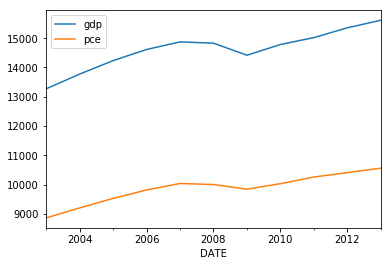

In [3]:
# try this with US GDP
us.plot()

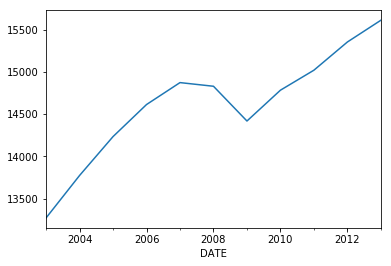

In [4]:
# do GDP alone
us['gdp'].plot()

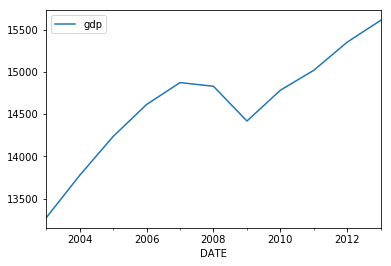

In [5]:
us.plot(y="gdp")

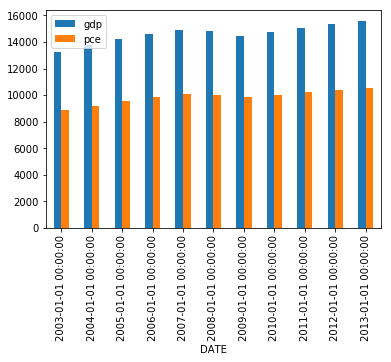

In [12]:
# bar chart 
us.plot(kind='bar')

In [ ]:
# scatter plot 
# we need to be explicit about the x and y variables: x = 'gdp', y = 'pce'
us.plot.scatter('gdp', 'pce')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117384fd0>], dtype=object)

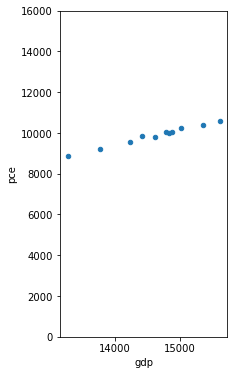

In [20]:
us.plot('gdp', 'pce', kind='scatter', subplots=True, sharey=True, figsize=(3,6), ylim=(0,16000))

**Exercise.**  Add each of these arguments, one at a time, to `us.plot()`:  

* `kind='area'`
* `subplots=True`
* `sharey=True`
* `figsize=(3,6)`
* `ylim=(0,16000)`

What do they do?

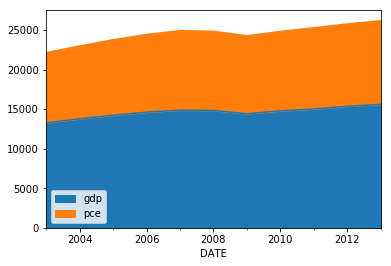

In [21]:
us.plot(kind='area')               # fill the area below

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1178e5a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117a3ac50>], dtype=object)

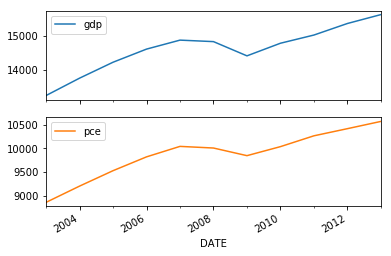

In [22]:
us.plot(subplots=True)                # make separate subplots for the variables in the dataframe

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117aa49e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117b4af60>], dtype=object)

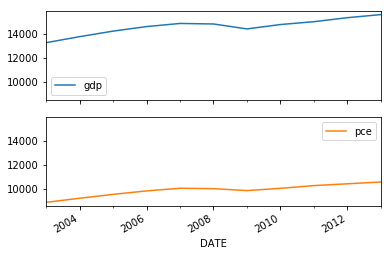

In [23]:
us.plot(subplots=True, sharey = True)              # make the y axis the same

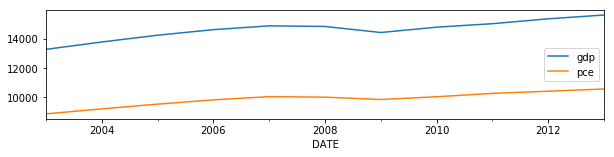

In [24]:
us.plot(figsize = (10, 2))           # first arg: width, second: height (inches)

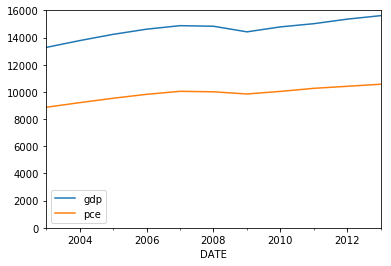

In [25]:
us.plot(ylim = (0, 16000))                     # change the range of the y axis

### Fama-French asset returns 

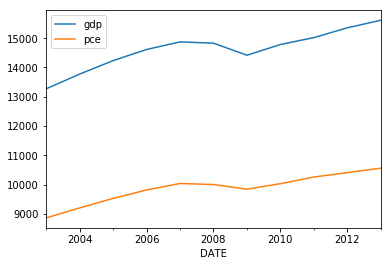

In [39]:
# now try a few things with the Fama-French data
us.plot()

**Exercise.** What do each of the arguments do in the code below?  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110236320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117fc4668>], dtype=object)

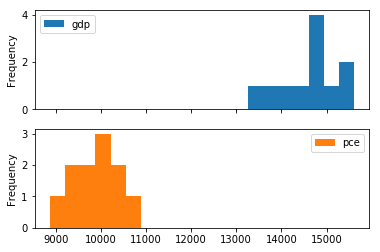

In [40]:
us.plot(kind='hist',         
        bins=20,             
        subplots=True)       

In [ ]:
# "smoothed" histogram 
ff.plot(kind='kde', subplots=True, sharex=True)    # smoothed histogram ("kernel density estimate")

**Exercise.**  Try adding the arguments `title='Fama-French returns'`, `grid=True`, and `legend=False`.  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1182ea320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119b17710>], dtype=object)

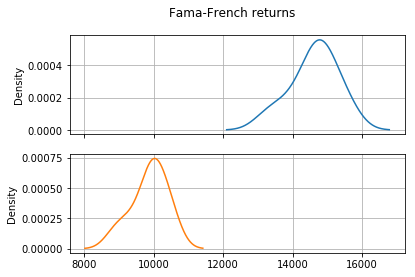

In [43]:
us.plot(kind='kde', 
        subplots=True, 
        sharex=True,
        title='Fama-French returns',
        grid=True,
        legend=False)

----------------------------------------
## Approach 2:  `plt.plot(x, y)`

Next up:  the popular `plot(x,y)` function from the pyplot module of Matplotlib.  We never use this and will go over it at high speed -- or perhaps not at all.

This is a more explicit version of `Matplotlib` graphics in which we specify the `x` and `y` variables directly. 

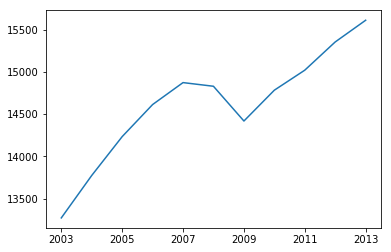

In [44]:
plt.plot(us.index, us['gdp'])

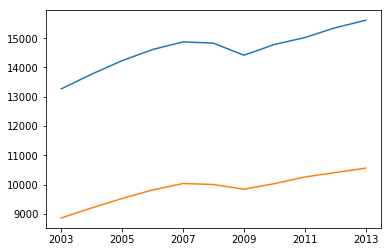

In [45]:
# we can do two lines together
plt.plot(us.index, us['gdp'])
plt.plot(us.index, us['pce'])

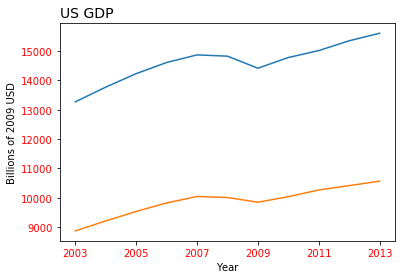

In [46]:
# we can also add things to plots 
plt.plot(us.index, us['gdp']) 
plt.plot(us.index, us['pce']) 

plt.title('US GDP', fontsize=14, loc='left')          # add title
plt.ylabel('Billions of 2009 USD')                    # y axis label 
plt.xlabel('Year')                                    # y axis label 
plt.tick_params(labelcolor='red')                     # change tick labels to red
#plt.legend(['GDP', 'Consumption'], loc='best')        

**Comment.** All of these statements must be in the same cell for this to work.  


**Comment.** This is overkill -- it looks horrible -- but it makes the point that we control everything in the plot.  We recommend you do very little of this until you're more comfortable with the basics.  

--------------------------------------------------
## Approach 3:  Create figure objects and apply methods

This approach is probably the most mysterious, but it's the **best**.  

The idea is to use the `matplotlib.pyplot` function `subplots()`, which creates two objects:
* `fig` : figure object -- blank canvas for creating a figure
* `ax`  : axis object -- everything in the figure: axes, labels, legend

apply methods on these objects to set the various elements of the graph. 

**Create objects.**   We'll see this line over and over:

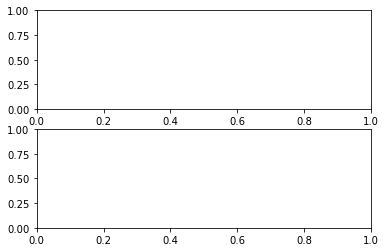

In [47]:
fig, ax = plt.subplots(2, 1)             # create fig and ax objects -- nrows, ncols

**Exercise.** What do we have here?  What `type` are `fig` and `ax`?  

In [48]:
print('fig is ', type(fig))
print('ax  is ', type(ax))

fig is  <class 'matplotlib.figure.Figure'>
ax  is  <class 'numpy.ndarray'>


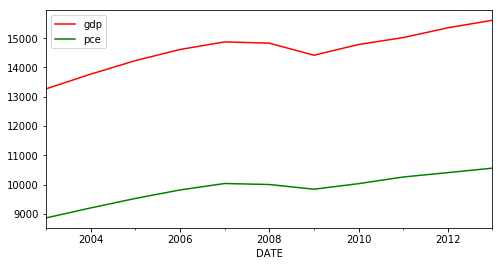

In [49]:
# let's try that again, this time with content  
fig, axe = plt.subplots(figsize=(8, 4))

# add things to ax 
us.plot(ax=axe, color = ['red', 'green']) 

**Comment.** Both of these statements must be in the same cell.  

AttributeError: 'dict' object has no attribute 'plot'

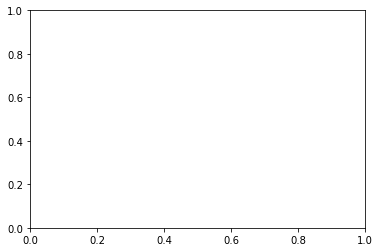

In [50]:
# Fama-French example 
fig, ax = plt.subplots()
ff.plot(ax=ax, 
        kind='line',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        title='Fama-French market and riskfree returns')

AttributeError: 'dict' object has no attribute 'plot'

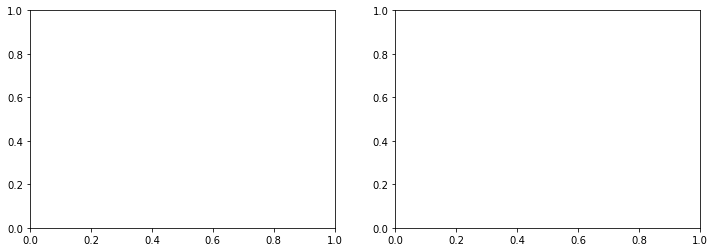

In [51]:
# Fama-French example 
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ff.plot(ax=ax[0], 
        kind='hist',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        alpha=0.65,
        bins=20,
        title='Fama-French market and riskfree returns')

ff.plot(ax=ax[1], 
        kind='kde',                 # line plot 
        color=['blue', 'magenta'],   # line color 
        title='Fama-French market and riskfree returns',
        alpha=0.65)

fig.tight_layout()

-----------------------------------
## Quick review of the bidding

We looked at three ways to use Matplotlib:

* Approach #1:  apply plot method to dataframe
* Approach #2:  use `plot(x,y)` function 
* Approach #3:  create `fig, ax` objects, apply plot methods to them

Same result, different syntax.  This is what each of them looks like applied to US GDP: 

```python
us['gdp'].plot()                   # Approach #1

plt.plot(us.index, us['gdp'])      # Approach #2

fig, ax = plt.subplots()           # Approach #3 
ax.plot(us.index, us['gdp'])  

# Or
fig, ax = plt.subplots()           # Approach #3 
us['gdp'].plot(ax=ax)

```

Each one produces the same graph.

Which one should we use?  **Use Approach #3.**  Really.  This is a case where choice is confusing.

We also suggest you not commit any of this to memory.  If you end up using it a lot, you'll remember it.  If you don't, it's not worth remembering. 

## Bells and whistles

### Adding things to graphs

Axis methods offer us great flexibility. Here's an example.

In [56]:
fig, ax = plt.subplots()

us.plot(ax=ax)

# Apply axis methods
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(['Real GDP', 'Consumption'], loc=0)  # more descriptive variable names 
ax.tick_params(labelcolor='red')               # change tick labels to red
ax.set_ylim(0)
ax.set_xlabel('Date')

SyntaxError: invalid syntax (<ipython-input-56-6cecb7fbe8a3>, line 12)

(Your results may differ, but we really enjoyed that.) 

**Exercise.** Use the `set_xlabel()` method to add an x-axis label.  What would you choose?  Or would you prefer to leave it empty?  

**Exercise.** Enter `ax.legend?` to access the documentation for the `legend` method.  What options appeal to you?  

**Exercise.**  Change the line width to 2 and the line colors to blue and magenta.  *Hint:*  Use `us.plot?` to get the documentation.  

**Exercise (challenging).** Use the `set_ylim()` method to start the `y` axis at zero.  *Hint:*  Use `ax.set_ylim?` to get the documentation.  

**Exercise.** Create a line plot for the Fama-French dataframe `ff` that includes both returns.  *Bonus points:* Add a title with the `set_title` method.  

SyntaxError: invalid syntax (<ipython-input-55-3a0238c8c08c>, line 2)

In [ ]:
fig, ax = plt.subplots()

us.plot(ax=ax, lw=2)       
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(['Real GDP', 'Consumption'], loc=2)     # more descriptive variable names 
ax.tick_params(labelcolor='green')                # change tick labels to green
ax.set_ylim(0)

### Multiple subplots 

Same idea, but we create a multidimensional `ax` and apply methods to each component. Here we redo the plots of US GDP and consumption.  

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
print('Object ax has dimension', ax.shape)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
print('Object ax has dimension', ax.shape)

ax[0, 1].plot(us.index, us['pce'])
ax[1, 0].plot(us.index, us['gdp'])

In [ ]:
# now add some content 
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

us['gdp'].plot(ax=ax[0], color='green')   # first plot
us['pce'].plot(ax=ax[1], color='red')     # second plot

----------------------------------------
## Examples

We conclude with examples that take data from the previous chapter and make better graphs than we did there.

### Student test scores (PISA) 

The international test scores often used to compare quality of education across countries.  

In [ ]:
url = 'http://dx.doi.org/10.1787/888932937035'
pisa = pd.read_excel(url, 
                     skiprows=18,                    # skip the first 18 rows 
                     skipfooter=7,                   # skip the last 7 
                     parse_cols=[0,1,9,13],          # select columns 
                     index_col=0,                    # set index = first column
                     header=[0,1]                    # set variable names 
                     )
pisa = pisa.dropna()                                 # drop blank lines 
pisa.columns = ['Math', 'Reading', 'Science']        # simplify variable names 

In [ ]:
# bar chart of math scores 
fig, ax = plt.subplots()
pisa['Math'].plot(kind='barh', ax=ax)  

**Comment.** Yikes!  That's horrible!  What can we do about it? Any suggestions?

Let's make the figure taller.  The `figsize` argument has the form `(width, height)`.  The default is `(6, 4)`.  We want a tall figure, so we need to increase the height setting.  

In [ ]:
# make the plot taller 
fig, ax = plt.subplots(figsize=(4, 13))  # note figsize 
pisa['Math'].plot(kind='barh', ax=ax)  
ax.set_title('PISA Math Score', loc='left')

**Comment.** What if we wanted to make the US bar red?  This is **far too** complicated, but we used our Google fu and found [a solution](http://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python).

In [ ]:
fig, ax = plt.subplots()
pisa['Math'].plot(ax=ax, kind='barh', figsize=(4,13))
ax.set_title('PISA Math Score', loc='left')

us_index = pisa.index.tolist().index('United States')
ax.get_children()[us_index].set_color('r')

**Exercise.** Create the same graph for the Reading score.  

### World Bank data

We'll use World Bank data for GDP, GDP per capita, and life expectancy to produce a few graphs and illsutrate some methods we haven't seen yet.   

* Bar charts of GDP and GDP per capita 
* Scatter plot (bubble plot) of life expectancy v GDP per capita 

In [ ]:
# variable list (GDP, GDP per capita, life expectancy)
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD', 'SP.DYN.LE00.IN']  
# country list (ISO codes)
iso = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
year = 2013

# get data from World Bank 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp', 'life'] # rename variables
df['pop']  = df['gdp']/df['gdppc']    # population 
df['gdp'] = df['gdp']/10**12          # convert to trillions
df['gdppc'] = df['gdppc']/10**3       # convert to thousands
df['order'] = [5, 3, 1, 4, 2, 6, 0]   # reorder countries
df = df.sort_values(by='order', ascending=False)
df

In [ ]:
# We'll use this same basic graph a few times.
# Let's make a function so we don't have to repeat the
# code to create 
def gdp_bar(variable="gdp"):
    fig, ax = plt.subplots()
    df[variable].plot(ax=ax, kind='barh', alpha=0.5)
    ax.set_title('Real GDP', loc='left', fontsize=14)
    ax.set_xlabel('Trillions of US Dollars')
    ax.set_ylabel('')
    return fig, ax
    

In [ ]:
gdp_bar()

In [ ]:
# ditto for GDP per capita (per person)
fig, ax = gdp_bar("gdppc")
ax.set_title('GDP Per Capita', loc='left', fontsize=14)

And just because it's fun, here's an example of Tufte-like axes from [Matplotlib examples](http://matplotlib.org/examples/ticks_and_spines/spines_demo_dropped.html):

In [ ]:
fig, ax = gdp_bar()

# Tufte-like axes
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

**Exercise (challenging).**  Make the ticks point out.  

In [ ]:
# scatterplot of life expectancy vs gdp per capita
fig, ax = plt.subplots()

ax.scatter(df['gdppc'], df['life'],     # x,y variables
           s=df['pop']/10**6,          # size of bubbles
           alpha=0.5)   
ax.set_title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.text(58, 66, 'Bubble size represents population', horizontalalignment='right')

**Exercise.** Make the bubble a little larger.  

**Exercise (challenging).** Add labels to the bubbles so we know which country they correspond to.

In [ ]:
# scatterplot of life expectancy vs gdp per capita
fig, ax = plt.subplots()

ax.scatter(df['gdppc'], df['life'],     # x,y variables
           s=df['pop']/10**6,          # size of bubbles
           alpha=0.5)   

ax.set_title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life Expectancy')
ax.text(58, 66, 'Bubble size represents population', horizontalalignment='right')

for (x, y, country) in zip(df['gdppc'], df['life'], df.index):
    ax.text(x, y, country)

## Review

Consider the data from Randal Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/):

In [ ]:
import pandas as pd
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

The dataframe `cals` contains the calories in 100 grams of several different foods.


**Exercise.** We'll create and modify visualizations of this data:

* Set `'Food'` as the index of `cals`.
* Create a bar chart with `cals` using figure and axis objects.
* Add a title.
* Change the color of the bars.  What color do you prefer?
* Add the argument `alpha=0.5`.  What does it do?
* Change your chart to a horizontal bar chart.  Which do you prefer?
* *Challenging.*  Eliminate the legend.
* *Challenging.*  Skim the top of Olson's [blog post](http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/). What do you see that you'd like to imitate?

## Where does that leave us?

* We now have several ways to produce graphs.  
* Next up:  think about what we want to graph and why. The tools serve that higher purpose.  